<IPython.core.display.Javascript object>


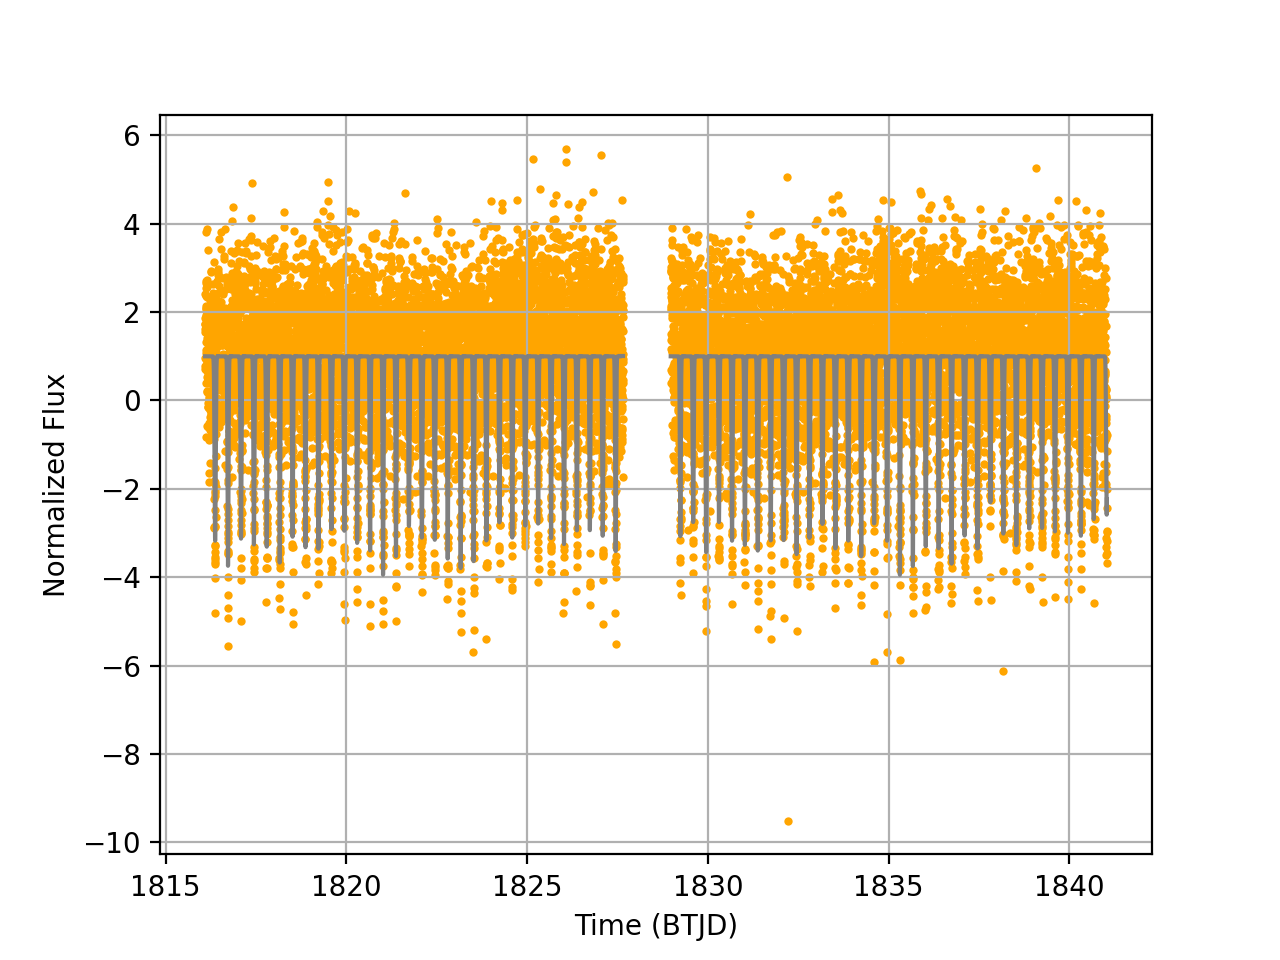


Parameters and their errors 1 :
A = 4.1716777873901 +/- 0.29798204906535125
mu = 1816.3674675203056 +/- 0.001561168961553978
Sigma = -0.015716908991337937 +/- 0.0015546743764688058 


Parameters and their errors 2 :
A = 4.739490462641891 +/- 0.3034953191767027
mu = 1816.7235476571118 +/- 0.0009941855393484167
Sigma = 0.013390944968908466 +/- 0.0010078691011553423 


Parameters and their errors 3 :
A = 4.125801532065076 +/- 0.313320928655132
mu = 1817.0831147889087 +/- 0.001240887513715258
Sigma = 0.014156798505311 +/- 0.0012409002075142535 


Parameters and their errors 4 :
A = 4.257210186786238 +/- 0.3286077095529222
mu = 1817.4400230323602 +/- 0.0011953119891357298
Sigma = -0.013560709992175027 +/- 0.0011622079298406055 


Parameters and their errors 5 :
A = 4.307388863713535 +/- 0.28337443036495485
mu = 1817.7957560678342 +/- 0.001175239907814187
Sigma = -0.01519194440055514 +/- 0.0011929889285097021 


Parameters and their errors 6 :
A = 4.667776494154715 +/- 0.3063295307452484
mu

/Users/valegarcia/anaconda3/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',



Parameters and their errors 33 :
A = -21.34148276419816 +/- inf
mu = 1827.1284595925902 +/- inf
Sigma = -0.012096226868066384 +/- inf 


Parameters and their errors 35 :
A = 4.07015229087043 +/- 0.3548560510438857
mu = 1829.2378797621068 +/- 0.0012571486765765225
Sigma = -0.012489075855780709 +/- 0.001262699622142649 


Parameters and their errors 36 :
A = 3.750419571389353 +/- 0.34571491638976415
mu = 1829.593261952776 +/- 0.0013723519270832328
Sigma = -0.013487494465039386 +/- 0.0014021045624999044 


Parameters and their errors 37 :
A = 4.429645570059697 +/- 0.3157642139189518
mu = 1829.9504189244067 +/- 0.0010497351539314399
Sigma = 0.012747684434221624 +/- 0.0010497345520768947 


Parameters and their errors 38 :
A = 3.749720962304218 +/- 0.34204350372606246
mu = 1830.3064700398288 +/- 0.0013761308385276155
Sigma = -0.013058855598189388 +/- 0.0013761300884356968 


Parameters and their errors 39 :
A = 4.172175329673361 +/- 0.3294036212350039
mu = 1830.6679886060042 +/- 0.00120250

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
import lightkurve as lk
from scipy.optimize import curve_fit
import pandas as pd

TIC = 'TIC 3034524'

data_all = lk.search_lightcurve(TIC, author='SPOC')

data = data_all[0]

lc = data.download_all().stitch()

# Define the Gaussian function
def gaussian_function(x, A, mu, sigma):
    return -(A * np.exp(-((x - mu)**2) / (2 * sigma**2))-1)

def process_chunk(start_index, end_index, mu_fit):
    Times = lc.time[start_index:end_index]
    t = Time(Times)
    x = np.array(t.btjd)
    y = np.array(lc.flux[start_index:end_index])
    
    # Remove invalid values (infs and NaNs) from y and x arrays
    mask_valid = ~np.isnan(y) & ~np.isinf(y)
    x = x[mask_valid]
    y = y[mask_valid]
    
    while len(x) > 3:
        # Fitting the curve to the data
        initial_guess = [10, mu_fit, 0.17]  # Assume initial values for A, μ and σ
        params, covariance = curve_fit(gaussian_function, x, y, p0=initial_guess)

        # Get fitted values for A, μ and σ
        A_fit, mu_fit, sigma_fit = params

        # Get the diagonals of the covariance matrix as the variances of A, μ and σ
        var_A_fit, var_mu_fit, var_sigma_fit = np.diag(covariance)

        # Create points for the fitted curve
        x_fit = np.linspace(min(x), max(x), 1000)
        y_fit = gaussian_function(x_fit, A_fit, mu_fit, sigma_fit)

        # Calculate the errors as the square root of the variances
        error_A_fit = np.sqrt(var_A_fit)
        error_mu_fit = np.sqrt(var_mu_fit)
        error_sigma_fit = np.sqrt(var_sigma_fit)

        plt.scatter(x, y, linewidth=0, color='orange', marker='.')
        plt.plot(x_fit, y_fit, color='gray')
        plt.xlabel('Time (BTJD)')
        plt.ylabel('Normalized Flux')
        plt.grid(True)
        plt.show()

        print("\nParameters and their errors", i, ":")
        print("A =", A_fit, "+/-", error_A_fit)
        print("mu =", mu_fit, "+/-", error_mu_fit)
        print("Sigma =", sigma_fit, "+/-", error_sigma_fit, "\n")
        return mu_fit
    if len(x) <= 3:
        mu_guess=1829
        initial_guess = [A_guess, mu_guess, sigma_guess]
        mu_fit = initial_guess[1]

        return mu_fit
    
# Define initial guesses for A, mu, and sigma
A_guess = 10
mu_guess = 1816.3
sigma_guess = 0.17

# Create the initial_guess list
initial_guess = [A_guess, mu_guess, sigma_guess]

# Get the period in julian days
period_julian_days = 0.357452436602186

# Initialize mu_fit with the initial guess value for mu
mu_fit = initial_guess[1]

# Iterate through the light curve and process chunks of data with the given period
start_index = 0
i=1
while start_index < len(lc):
    end_time = lc.time[start_index] + period_julian_days
    end_index = np.searchsorted(lc.time, end_time, side='right')
    
    # Call process_chunk with the updated mu_fit value
    mu_fit = process_chunk(start_index, end_index, mu_fit)
    mu_fit = mu_fit + period_julian_days   
    
    #Update the start_index for the next iteration
    start_index = end_index
    i=i+1

<IPython.core.display.Javascript object>


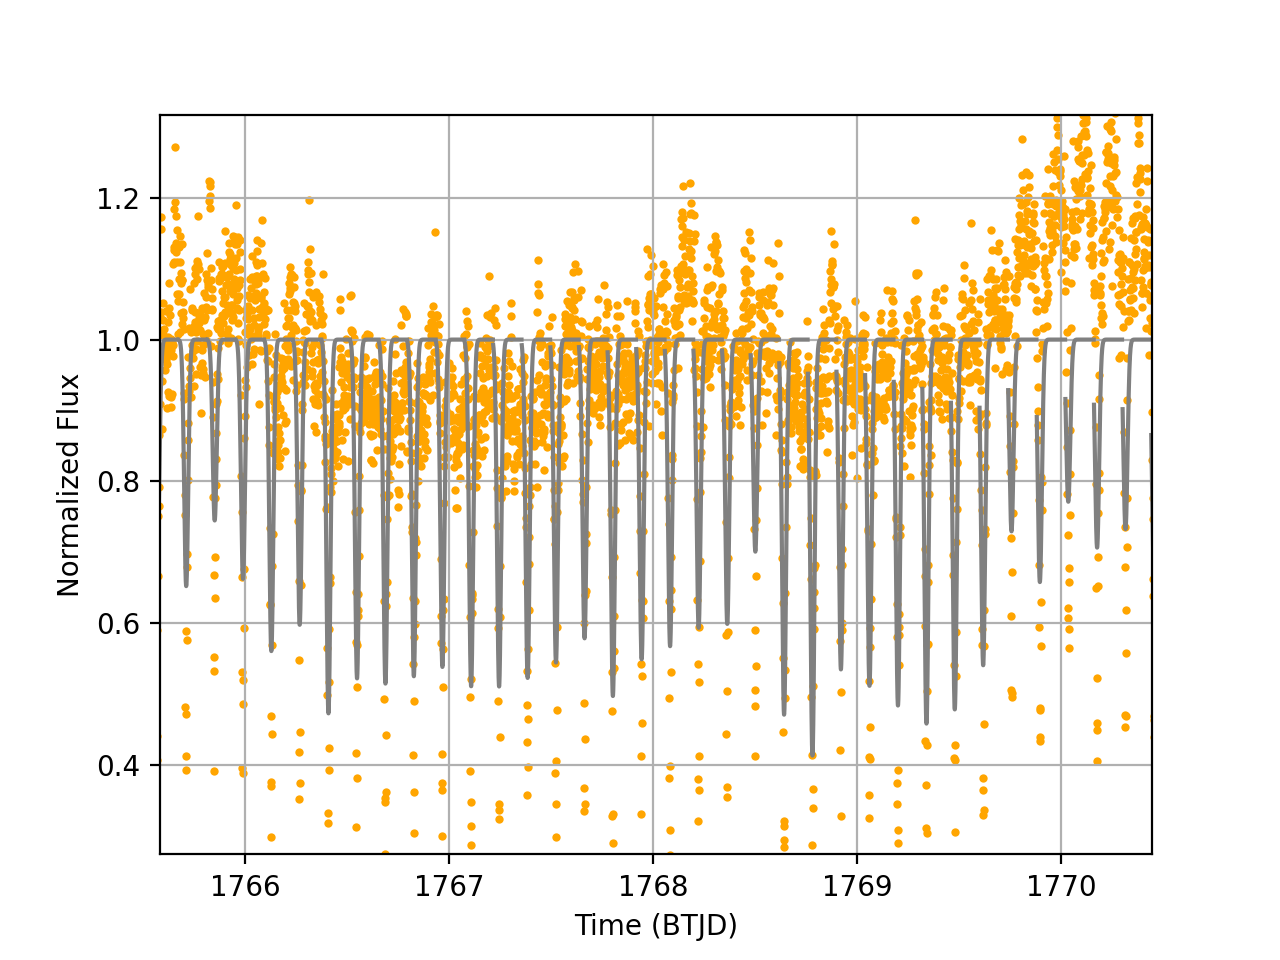


Parameters and their errors 1 :
A = 0.27726959760253006 +/- 0.03693185543097126
mu = 1764.732266931801 +/- 0.001538043567423625
Sigma = 0.010000000000001364 +/- 0.001538042470657674 


Parameters and their errors 2 :
A = 0.3026447298647223 +/- 0.037246824345956525
mu = 1764.8721867059724 +/- 0.0014211041011625532
Sigma = 0.010000000000000002 +/- 0.0014211031561697388 


Parameters and their errors 3 :
A = 0.2721033508773467 +/- 0.04120559868198979
mu = 1765.0130216214095 +/- 0.0017486065502777626
Sigma = 0.010000000001540449 +/- 0.001748605264029667 


Parameters and their errors 4 :
A = 0.266755541026847 +/- 0.04095551729661613
mu = 1765.1526231481605 +/- 0.0017728342786386584
Sigma = 0.0100000000039252 +/- 0.0017728433840727522 


Parameters and their errors 5 :
A = 0.35154647408089873 +/- 0.03838014976044534
mu = 1765.2901819518154 +/- 0.0013104300572945036
Sigma = 0.010000000000000162 +/- 0.0012365379327270026 


Parameters and their errors 6 :
A = 0.37837741443542633 +/- 0.029213


Parameters and their errors 45 :
A = 0.440196099030447 +/- 0.03799466607421033
mu = 1770.8746746061734 +/- 0.0011681589283652368
Sigma = 0.010000000000000002 +/- 0.001305101937844198 


Parameters and their errors 46 :
A = 0.4037957245650059 +/- 0.04995326036636307
mu = 1771.0132169362134 +/- 0.0018889975276324036
Sigma = 0.010000000000000002 +/- 0.002063614165993784 


Parameters and their errors 47 :
A = 0.44279987374041674 +/- 0.046021212602847236
mu = 1771.1540806837068 +/- 0.0015154685074835604
Sigma = 0.010000000000000002 +/- 0.0016734104032848686 


Parameters and their errors 48 :
A = 0.4895998226530215 +/- 0.03876069314823679
mu = 1771.294209084546 +/- 0.0011676182792093872
Sigma = 0.010000000000003693 +/- 0.001286142695854205 


Parameters and their errors 49 :
A = 0.43219072805411723 +/- 0.06441354279560882
mu = 1771.4326116452153 +/- 0.002617038662910934
Sigma = 0.010000000000000002 +/- 0.0027424016387548027 


Parameters and their errors 50 :
A = 0.44786008573903757 +/- 0


Parameters and their errors 136 :
A = 0.2563 +/- 0.0
mu = 1783.573980508129 +/- 0.0
Sigma = 0.0100000001 +/- 0.0 


Parameters and their errors 137 :
A = 0.2563 +/- 0.0
mu = 1783.7135764894397 +/- 0.0
Sigma = 0.0100000001 +/- 0.0 


Parameters and their errors 138 :
A = 0.2563 +/- 0.0
mu = 1783.8531724707505 +/- 0.0
Sigma = 0.0100000001 +/- 0.0 


Parameters and their errors 139 :
A = 0.2563 +/- 0.0
mu = 1783.9927684520612 +/- 0.0
Sigma = 0.0100000001 +/- 0.0 


Parameters and their errors 140 :
A = 0.2563 +/- 0.0
mu = 1784.132364433372 +/- 0.0
Sigma = 0.0100000001 +/- 0.0 


Parameters and their errors 141 :
A = 0.2563 +/- 0.0
mu = 1784.2719604146828 +/- 0.0
Sigma = 0.0100000001 +/- 0.0 


Parameters and their errors 142 :
A = 0.2563 +/- 0.0
mu = 1784.4115563959936 +/- 0.0
Sigma = 0.0100000001 +/- 0.0 


Parameters and their errors 143 :
A = 0.2563 +/- 0.0
mu = 1784.5511523773043 +/- 0.0
Sigma = 0.0100000001 +/- 0.0 


Parameters and their errors 144 :
A = 0.2563 +/- 0.0
mu = 1784.69

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
import lightkurve as lk
from scipy.optimize import curve_fit
import pandas as pd

TIC = 'TIC 18250189'

data_all = lk.search_lightcurve(TIC, author='SPOC')

data = data_all[0]

lc = data.download_all().stitch()

# Define the Gaussian function
def gaussian_function(x, A, mu, sigma):
    return -(A * np.exp(-((x - mu)**2) / (2 * sigma**2))-1)

def process_chunk(start_index, end_index, mu_fit):
    Times = lc.time[start_index:end_index]
    t = Time(Times)
    x = np.array(t.btjd)
    y = np.array(lc.flux[start_index:end_index])
    
    # Remove invalid values (infs and NaNs) from y and x arrays
    mask_valid = ~np.isnan(y) & ~np.isinf(y)
    x = x[mask_valid]
    y = y[mask_valid]
    
    while len(x) > 3:
        # Fitting the curve to the data
        initial_guess = [0.2563, mu_fit, 0.01]  # Assume initial values for A, μ and σ
        
        # Specify parameter bounds here
        bounds = ([0, mu_fit - 0.05, 0.01], [10, mu_fit + 0.05, 0.1])
        
        params, covariance = curve_fit(gaussian_function, x, y, p0=initial_guess, bounds = bounds)

        # Get fitted values for A, μ and σ
        A_fit, mu_fit, sigma_fit = params

        # Get the diagonals of the covariance matrix as the variances of A, μ and σ
        var_A_fit, var_mu_fit, var_sigma_fit = np.diag(covariance)

        # Create points for the fitted curve
        x_fit = np.linspace(min(x), max(x), 1000)
        y_fit = gaussian_function(x_fit, A_fit, mu_fit, sigma_fit)

        # Calculate the errors as the square root of the variances
        error_A_fit = np.sqrt(var_A_fit)
        error_mu_fit = np.sqrt(var_mu_fit)
        error_sigma_fit = np.sqrt(var_sigma_fit)

        mu_fit_values.append(mu_fit)
        error_mu_fit_values.append(error_mu_fit)
        
        plt.scatter(x, y, linewidth=0, color='orange', marker='.')
        plt.plot(x_fit, y_fit, color='gray')
        plt.xlabel('Time (BTJD)')
        plt.ylabel('Normalized Flux')
        plt.grid(True)
        plt.show()

        print("\nParameters and their errors", i, ":")
        print("A =", A_fit, "+/-", error_A_fit)
        print("mu =", mu_fit, "+/-", error_mu_fit)
        print("Sigma =", sigma_fit, "+/-", error_sigma_fit, "\n")
        return mu_fit
    if len(x) <= 3:
        mu_guess= 1777.85513003
        
        return mu_fit
    
# Define initial guesses for A, mu, and sigma
A_guess = 0.2563
mu_guess = 1764.73228
sigma_guess = 0.01345

# Create the initial_guess list
initial_guess = [A_guess, mu_guess, sigma_guess]

# Get the period in julian days
period_julian_days = 0.13959598131089002

# Initialize mu_fit with the initial guess value for mu
mu_fit = initial_guess[1]

# Initialize empty lists for mu_fit and error_mu_fit
mu_fit_values = []
error_mu_fit_values = []

# Iterate through the light curve and process chunks of data with the given period
start_index = 0
i=1
while start_index < len(lc):
    end_time = lc.time[start_index] + period_julian_days
    end_index = np.searchsorted(lc.time, end_time, side='right')
    
    # Call process_chunk with the updated mu_fit value
    mu_fit = process_chunk(start_index, end_index, mu_fit)
    mu_fit = mu_fit + period_julian_days   
    
    #Update the start_index for the next iteration
    start_index = end_index
    i=i+1
    
data_table = pd.DataFrame({
    'mu_fit': mu_fit_values,
    'error_mu_fit': error_mu_fit_values
})

#data_table.to_csv("/Users/Menna/Downloads/O Values", index = False)

print(data_table)